In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ames Housing Dataset: This dataset contains 79 features detailing various aspects of residential properties in Ames, Iowa, including lot size, number of bedrooms, and neighborhood characteristics. It serves as a robust dataset for building regression models to predict housing prices, offering more complexity and richness compared to traditional datasets like the Boston Housing dataset.

In [3]:
#dealing with outliers
#using a function that deals with outliers

In [4]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [5]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
#basically what we want to do with our data is top be able to predict the sales of a house given all those features
#our label is saleprice

In [7]:
#firstly we are going to check if we have any outlier sales
#then check for the features that are highly correlated to the saleprice

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [9]:
df.corr(numeric_only=True)["SalePrice"].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

In [10]:
#we can see that the overall quality is highest positively correlated to the sales price
#lets visualize this correlation using a scatterplot

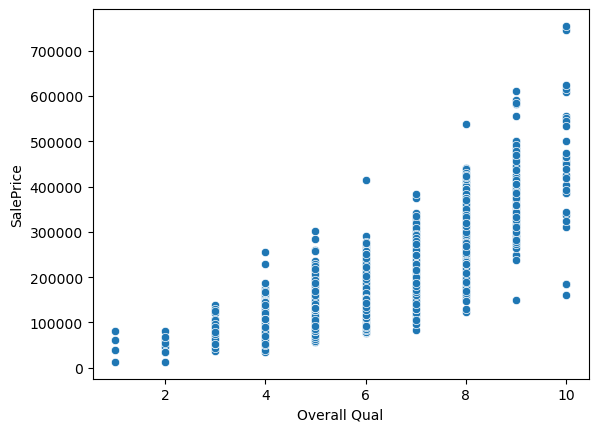

In [11]:
sns.scatterplot(x = "Overall Qual", y ="SalePrice", data = df);

In [12]:
#as quality goes up ...so is the sale price
#we can observe several outliers - houses with very high quality but low priced

In [13]:
#lets visualise living area feature and salesprice

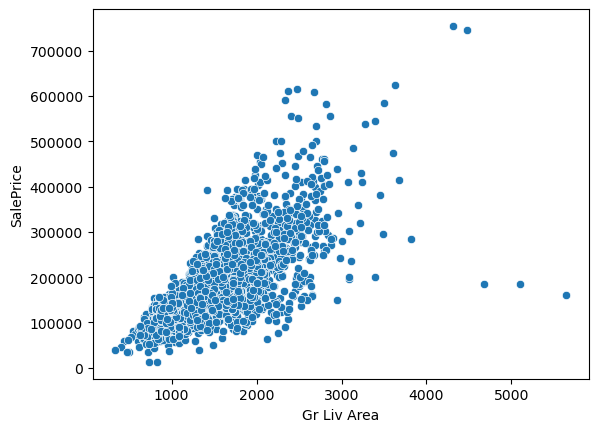

In [14]:
sns.scatterplot(x = "Gr Liv Area", y ="SalePrice", data = df);

In [15]:
#we can see three houses having a large living area but low sale price
#since we cannot determine the houses visually;

In [16]:
df[(df["Overall Qual"]>8) & (df["SalePrice"] <200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [17]:
#we can tell that these houses are outliers in our model
#let's remove these houses

In [18]:
df[(df["Gr Liv Area"] > 4000) & (df['SalePrice'] < 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [19]:
#we can see that these outliers appear in both large living area and house quality sales relationshio

In [20]:
#we have three main outliers- which we are going to drop

In [21]:
drop_index = df[(df["Gr Liv Area"] > 4000) & (df['SalePrice'] < 400000)].index

In [22]:
df = df.drop(drop_index, axis = 0)

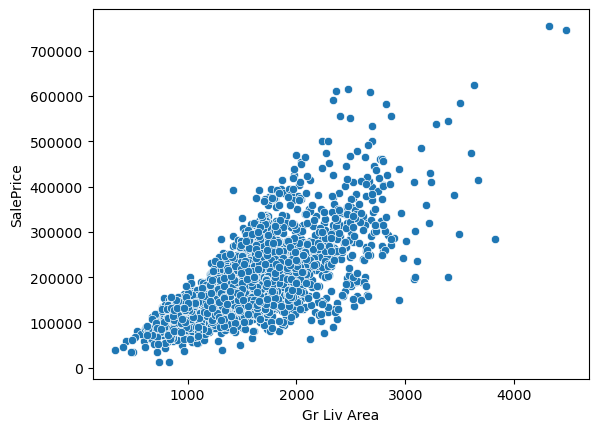

In [23]:
#checking the scatter plot after dropping the outliers
sns.scatterplot(x = "Gr Liv Area", y ="SalePrice", data = df);

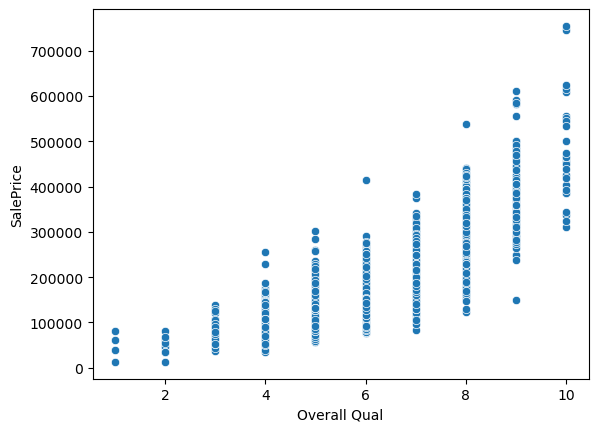

In [24]:
sns.scatterplot(x = "Overall Qual", y ="SalePrice", data = df);

In [25]:
#now we can save the cleaned data

In [26]:
df.to_csv(" Ames Housing Outliers Removed")

In [27]:
#NEXT STEP
#dealing with missing data

In [28]:
with open("Ames_Housing_Feature_Description.txt","r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [29]:
df = pd.read_csv("Ames_outliers_removed.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [31]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


The pid column is a unique identifier for the houses which serves the same role as the indexes


In [33]:
df = df.drop("PID",axis = 1)

In [34]:
len(df.columns)

80

In [35]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [36]:
100* df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

From the above,we cannot tell what percentage of data is missing. We are going to do that using a function|

In [38]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan
    

In [39]:
#this function is applicable to any datasets
#the function returns the percentages of the missing data 

In [40]:
percent_nan = percent_missing(df)

In [41]:
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

This indicates that the Pool QC has 99% mising data.We will visualise this data using a barplot

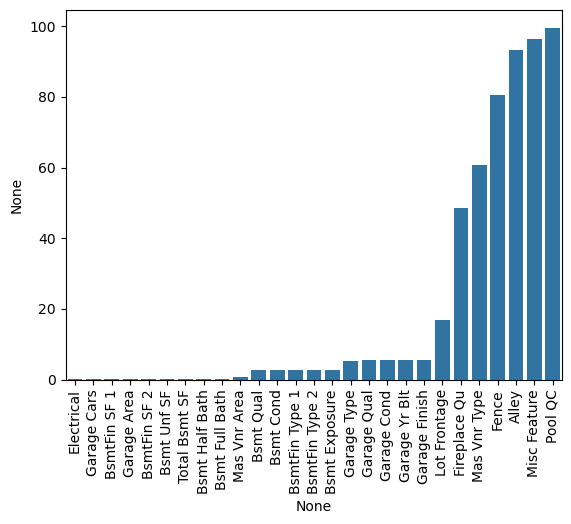

In [43]:
sns.barplot(x = percent_nan.index , y = percent_nan )
plt.xticks(rotation = 90);

In [44]:
#we have evaluated the missing data
#the next step is to determine how we are going to deal with it

In [45]:
#filling in data for rows
#for data that has very minimal missing data

In [46]:
#here, we can consider dropping the rows or filling in with a reasonable data
#based off domain

(0.0, 1.0)

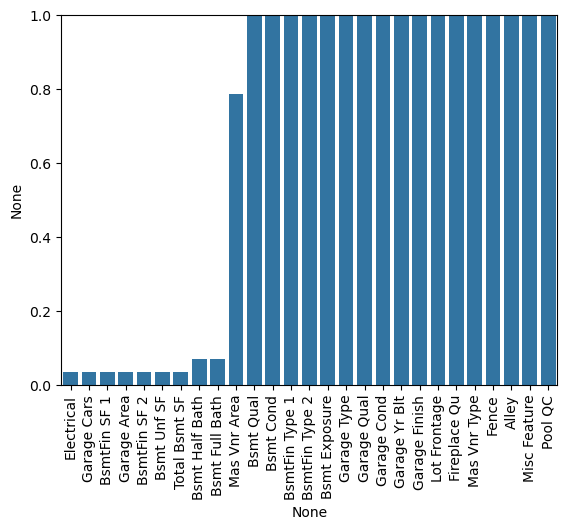

In [47]:
sns.barplot(x = percent_nan.index , y = percent_nan )
plt.xticks(rotation = 90);
plt.ylim(0,1)

In [48]:
#we are setting a limit of what percent missing in a data is okay to drop
#we have several rows with less than 0.2% misssing data
#checking out which exact rows have less than 1

In [49]:
percent_nan[percent_nan <1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [50]:
100/ len(df)

0.0341646737273659

In [51]:
#we can see that 1 row is equal to 0.0341646737273659,
#which indicate that one row has missing values for 7 of the above features

In [52]:
df[df["Electrical"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [53]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [54]:
 df[df["BsmtFin SF 1"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [55]:
#different rows are misssing data

In [56]:
df = df.dropna( axis=0, subset =["Electrical","Garage Cars"])

In [57]:
percent_nan = percent_missing(df)

In [58]:
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

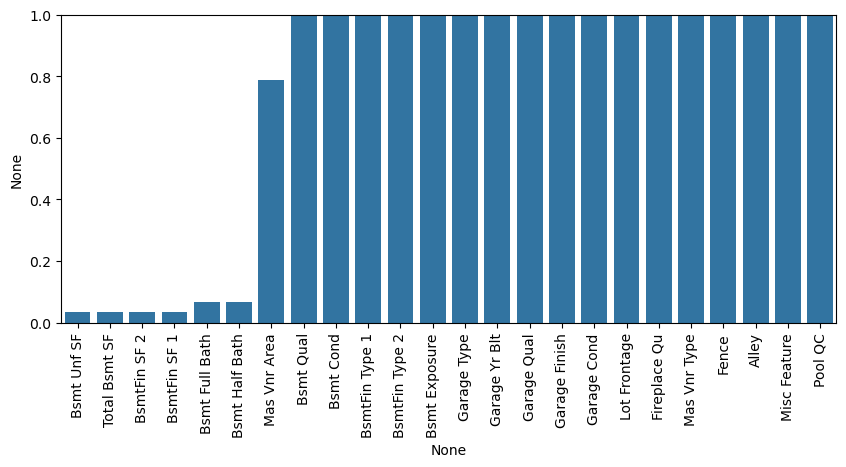

In [59]:
fig = plt.figure(figsize=(10,4))
sns.barplot(x = percent_nan.index , y = percent_nan )
plt.xticks(rotation = 90);
plt.ylim(0,1)

In [60]:
#we have managed to drop several rows with missing values

In [61]:
#the other rows with small % missing values are majorly basement features
#domain knowledge is important

In [62]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [63]:
df[df["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [64]:
df[df["Bsmt Unf SF"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [65]:
#we can see the same row has missing basement values

In [66]:
#for basement numeric column --> fillna 0
bsmt_num_cols =['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']

df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

#for basement string columns
bsmt_str_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [67]:
df[df["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [68]:
#lets see how much data is still missing

(0.0, 1.0)

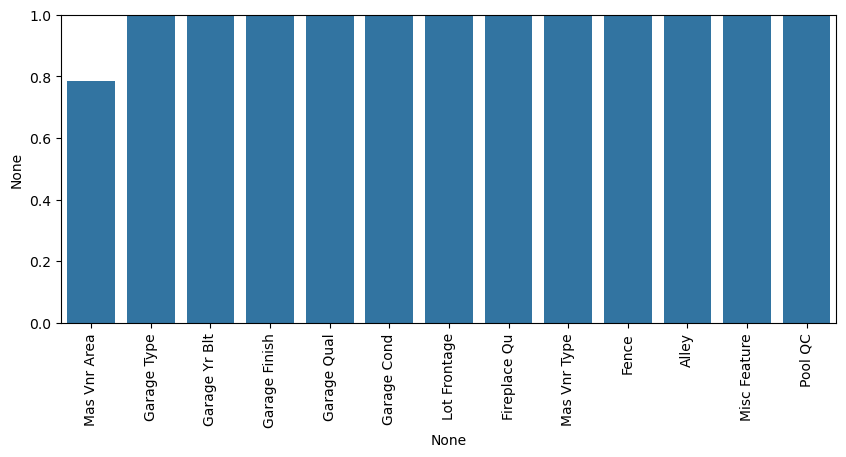

In [69]:
percent_nan = percent_missing(df)

fig = plt.figure(figsize=(10,4))
sns.barplot(x = percent_nan.index , y = percent_nan )
plt.xticks(rotation = 90);
plt.ylim(0,1)

In [70]:
#we still have mas vint Area missing < 1

In [71]:
df['Mas Vnr Type'].isnull().sum()

1773

In [72]:
#df['Mas Vnr Type'].to_string()

In [73]:
#df['Mas Vnr Area'].to_string()

In [74]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

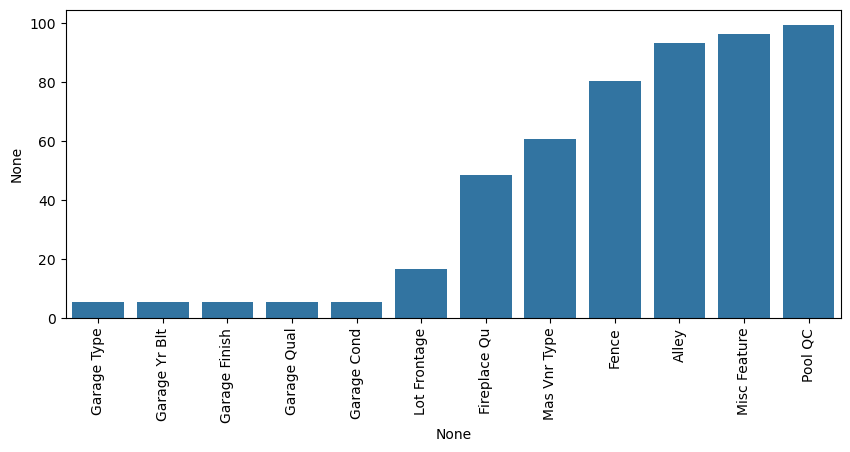

In [75]:
percent_nan = percent_missing(df)

fig = plt.figure(figsize=(10,4))
sns.barplot(x = percent_nan.index , y = percent_nan )
plt.xticks(rotation = 90);


In [76]:
df['Mas Vnr Type']

0         Stone
1           NaN
2       BrkFace
3           NaN
4           NaN
         ...   
2922        NaN
2923        NaN
2924        NaN
2925        NaN
2926    BrkFace
Name: Mas Vnr Type, Length: 2925, dtype: object

In [77]:
#the remaining data has missing data that is above 1%

In [78]:
#from featurs description, most of missing garage values are due to the fact that those houses do not have a garage

In [79]:
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']

In [80]:
df[gar_str_cols]=df[gar_str_cols].fillna('None')

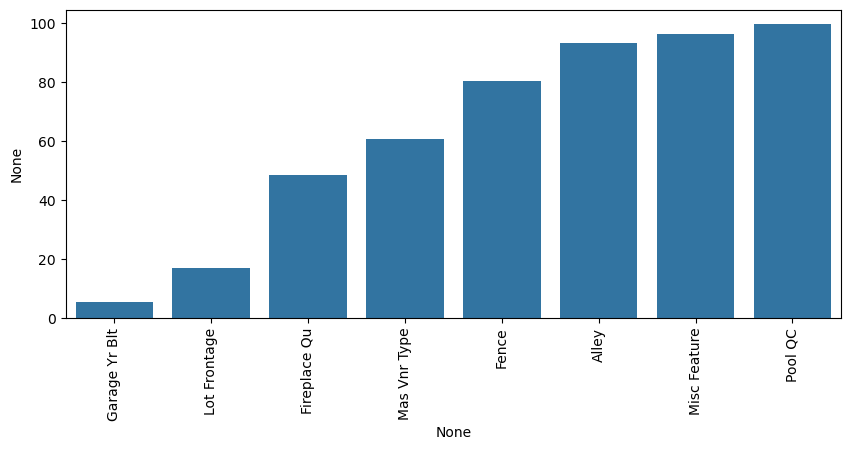

In [81]:
percent_nan = percent_missing(df)

fig = plt.figure(figsize=(10,4))
sns.barplot(x = percent_nan.index , y = percent_nan )
plt.xticks(rotation = 90);


In [82]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

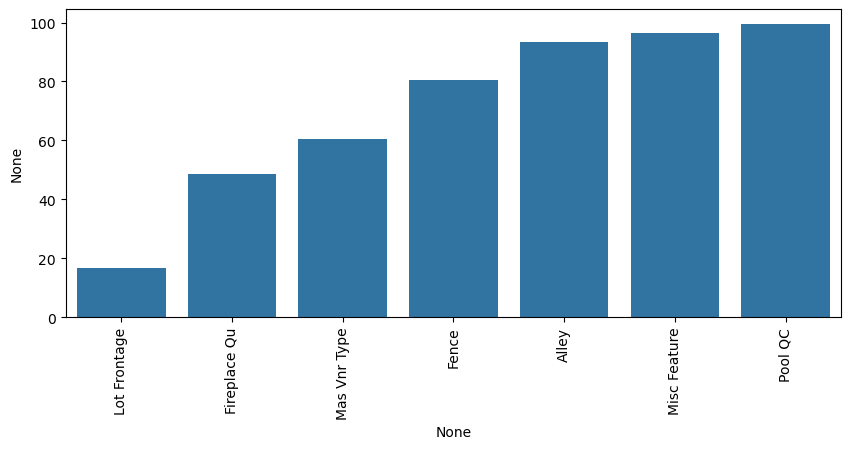

In [83]:
percent_nan = percent_missing(df)

fig = plt.figure(figsize=(10,4))
sns.barplot(x = percent_nan.index , y = percent_nan )
plt.xticks(rotation = 90);

In [84]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence','Mas Vnr Type'],axis = 1)

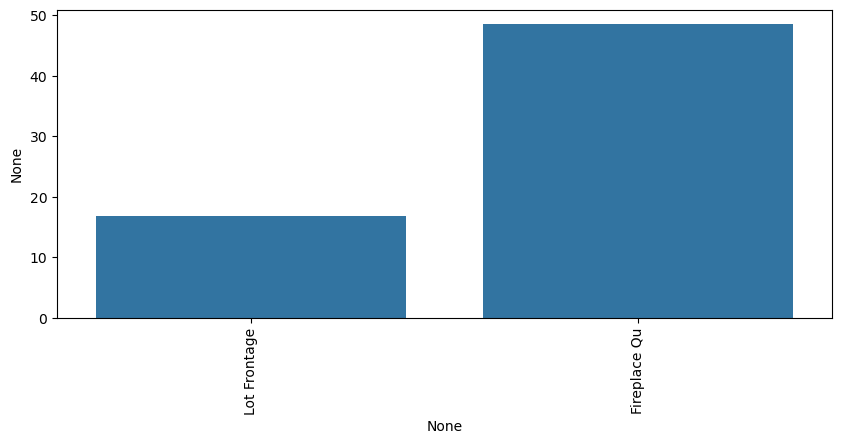

In [85]:
percent_nan = percent_missing(df)

fig = plt.figure(figsize=(10,4))
sns.barplot(x = percent_nan.index , y = percent_nan )
plt.xticks(rotation = 90);

In [86]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

In [87]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [88]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

In [89]:
#Lot Frontage is numeric 
#we are going to use the neighbourhood feature 
#i.e we are going to make an assunption that lot frontage is connected to neighbourhood

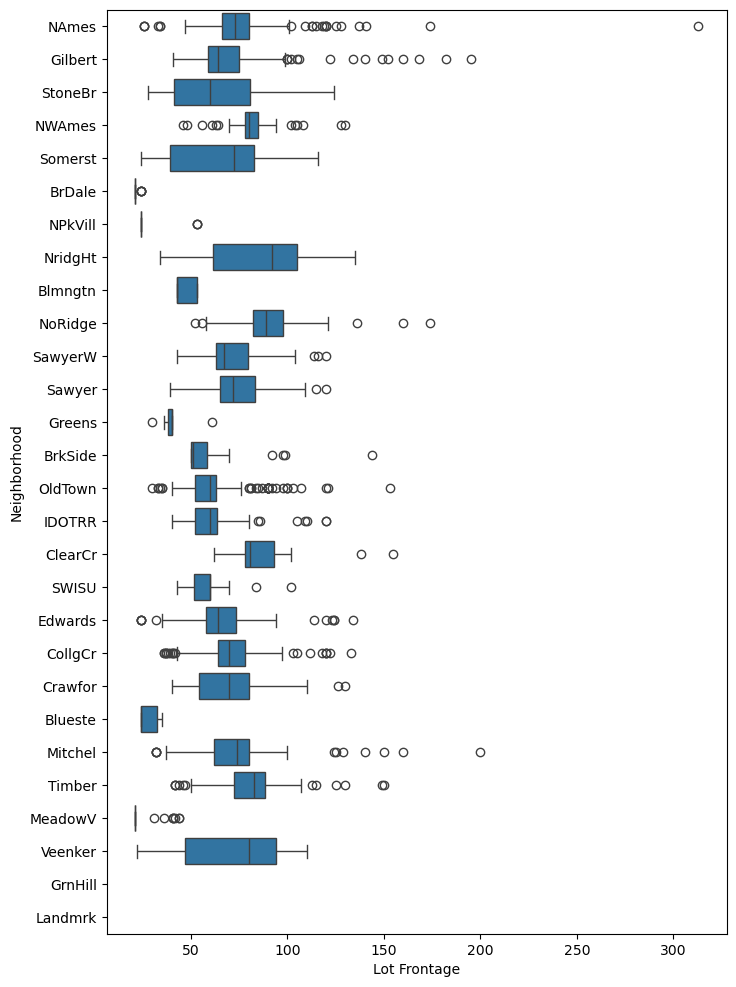

In [90]:
fig = plt.figure(figsize = (8,12))
sns.boxplot( x ='Lot Frontage', y= 'Neighborhood',data = df , orient = 'h');

In [91]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [92]:
#here we want to fill in the missing lot frontage with the average frontage in that neighborhood

In [93]:
df['Lot Frontage'] =df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value:value.fillna(value.mean))

In [94]:
df['Lot Frontage']

0                                                   141.0
1                                                    80.0
2                                                    81.0
3                                                    93.0
4                                                    74.0
                              ...                        
2922                                                 37.0
2923    <bound method Series.mean of 309      85.0\n31...
2924                                                 62.0
2925                                                 77.0
2926                                                 74.0
Name: Lot Frontage, Length: 2925, dtype: object

In [95]:
#df.isnull()

In [96]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 75, dtype: int64

In [97]:
df.to_csv("AMES_Final_DF")

In [98]:
df = pd.read_csv("AMES_Final_DF.csv")

In [99]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


In [101]:
#df.columns

In [102]:
X = df.drop('SalePrice',axis = 1)

In [103]:
y = df['SalePrice']

In [104]:
#spliting the dataset into train and test data
#train = 90% and test = 10% 

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [107]:
#feature scaling

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

In [110]:
scaler.fit(X_train)

StandardScaler()

In [111]:
X_train = scaler.transform(X_train)

In [112]:
X_test = scaler.transform(X_test)

In [113]:
#using elastic model

In [114]:
from sklearn.linear_model import ElasticNet

In [115]:
elastic_model = ElasticNet(max_iter = 10000000)

In [116]:
param_grid = {'alpha':[0.1,1,5,10,50,100,150,200],'l1_ratio':[.1,.5,.88,.90,.97,1,5,10,]}

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
grid_model = GridSearchCV( estimator = elastic_model,param_grid = param_grid, scoring = 'neg_mean_squared_error',cv = 5, verbose = 1)

In [119]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\MINIONS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MINIONS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MINIONS\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\MINIONS\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\MINIONS\anaconda3\Lib\sit

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100, 150, 200],
                         'l1_ratio': [0.1, 0.5, 0.88, 0.9, 0.97, 1, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [120]:
grid_model.best_params_

{'alpha': 150, 'l1_ratio': 1}

In [121]:
#evaluate model performance

In [122]:
y_pred = grid_model.predict(X_test)

In [123]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [124]:
mean_absolute_error(y_test,y_pred)

14195.033797515905

In [125]:
mean_squared_error(y_test,y_pred)

423207075.6398855

In [126]:
np.sqrt(mean_squared_error(y_test,y_pred))

20571.997366320207

In [127]:
np.mean(df['SalePrice'])

180815.53743589742

The analysis of the Ames Housing dataset revealed key factors influencing housing prices, such as lot size, number of bedrooms, and neighborhood quality. The regression model effectively predicted housing prices with notable accuracy. Insights from the analysis suggest that property size and condition significantly impact prices, and interaction effects between features were observed.

While the model performed well, limitations such as potential data issues and the exclusion of macroeconomic factors were noted. Future work could involve exploring advanced modeling techniques and incorporating additional data for enhanced predictions.

Overall, the project demonstrated the effectiveness of regression analysis in real estate price prediction and provided valuable insights into the factors driving housing values in Ames, Iowa.